In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
suhi_combined_file_path = '/content/drive/MyDrive/SUHI/Data/CAP_Postdischarge_data_16FEB24.xlsx - coded.csv'
suhi_10_29_24_file_path = '/content/SUHI_MATRIX_WITH_CHW_Notes_10_29_2024_with_combined_notes.csv'
suhi_df = pd.read_csv(suhi_10_29_24_file_path)

In [ ]:
suhi_df

,record_id,age,sum_contact_attempts_calc,contact_attempts,day_readmit,total_time_spent,Visit_Number,Count_of_visit,comorbidity,sumComorbidities,...,resources_covid_notes,resources_diabetes_notes,resources_asthma_notes,resources_alc_notes,resources_substance_notes,resources_emotional_notes,sdoh_other_notes,resources_other_notes,sdoh_notes,combined_notes
0,2,66.0,NaN,3.0,0.0,0.0,1,2,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,3.0,0.0,21.0,2,2,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,50.0,NaN,3.0,1.0,21.0,1,1,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,declined
3,5,61.0,NaN,4.0,0.0,50.0,1,2,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SDOH, EMOTIONAL SUPPORT, CLOSED CASE"
4,5,59.0,NaN,3.0,0.0,15.0,2,2,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2615,2311,60.0,3.0,3.0,0.0,21.0,1,1,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I reached out to the pt but received no respon...
2616,2312,35.0,5.0,3.0,0.0,21.0,1,1,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/14/24 11:10am I called and spoke to pt. Pt ...
2617,2313,49.0,NaN,3.0,0.0,21.0,1,1,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2618,2314,62.0,NaN,3.0,0.0,21.0,1,1,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Print columns with notes in the df
suhi_df.columns[suhi_df.columns.str.contains('notes_contact')]

Index(['notes_contact1', 'notes_contact2', 'notes_contact3', 'notes_contact4',
       'notes_contact5', 'notes_contact6', 'notes_contact7', 'notes_contact8',
       'notes_contact9', 'notes_contact10'],
      dtype='object')

In [ ]:
excluded_words = []
#  ['lvm', 'closed case', 'case closed', 'left a vm', 'no response', 'declined', 'no answer', 'pt unavailable']

suhi_df['combined_notes'] = suhi_df[suhi_df.columns[suhi_df.columns.str.contains('notes_contact')]].apply(
    lambda x: '. '.join([note for note in x.dropna().astype(str).str.lower()
                         if len(note.split()) >= 2 and not any(excluded_word in note for excluded_word in excluded_words)]),
    axis=1
)

In [ ]:
suhi_df['combined_notes'].value_counts()

,count
combined_notes,
,1098
closed case,15
declined services,7
declined services,5
closed case,3
...,...
phone disconnected,1
assisted pt with scheduling ride to dr appt. also informed pt about superior transport service and provided pt with contact information. pt stated he has a case manager and has no other needs at this time.,1
left a vm. closed case,1


In [ ]:
suhi_df['day_readmit'].value_counts()

,count
day_readmit,
0.0,1987
1.0,629
2.0,4


In [ ]:
# If day_readmit is 2 change it to 0
suhi_df.loc[suhi_df['day_readmit'] == 2, 'day_readmit'] = 0

In [ ]:
suhi_df['day_readmit'].value_counts()

,count
day_readmit,
0.0,1991
1.0,629


In [ ]:
suhi_df['day_readmit'].value_counts()

,count
day_readmit,
0.0,1991
1.0,629


In [ ]:
# Filter records to create a new df without nulls in day_readmit
suhi_filtered_df = suhi_df[suhi_df['day_readmit'].notnull()]

In [ ]:
# Create new cols that shows the combined_notes character length and word count
suhi_filtered_df['combined_notes_char_len'] = suhi_filtered_df['combined_notes'].str.len()
suhi_filtered_df['combined_notes_word_count'] = suhi_filtered_df['combined_notes'].str.split().str.len()

In [ ]:
suhi_filtered_df = suhi_filtered_df[suhi_filtered_df['combined_notes_char_len'] != 0]

In [ ]:
suhi_filtered_df

,record_id,age,sum_contact_attempts_calc,contact_attempts,day_readmit,total_time_spent,Visit_Number,Count_of_visit,comorbidity,sumComorbidities,...,resources_asthma_notes,resources_alc_notes,resources_substance_notes,resources_emotional_notes,sdoh_other_notes,resources_other_notes,sdoh_notes,combined_notes,combined_notes_char_len,combined_notes_word_count
3,5,61.0,NaN,4.0,0.0,50.0,1,2,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,emotional support. closed case,30,4
6,8,73.0,NaN,3.0,0.0,21.0,1,1,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sdoh/ declined,14,2
7,9,61.0,NaN,7.0,1.0,240.0,1,1,1,1.0,...,NaN,NaN,NaN,We Check-in weekly.,NaN,NaN,NaN,looking for housing in the same and needs acce...,308,59
8,10,57.0,NaN,3.0,0.0,50.0,1,1,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sdoh/ emotional support. emotiional support/ c...,55,7
9,11,69.0,NaN,3.0,1.0,20.0,1,1,0,0.0,...,NaN,NaN,NaN,Weekly Checkins,NaN,NaN,NaN,declined completed sdoh,23,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,2309,38.0,2.0,3.0,0.0,21.0,1,1,1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"i dialed the phone number we have on file, 773...",371,68
2614,2310,26.0,5.0,3.0,0.0,21.0,1,1,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2/14/24 10:31am i called and spoke to pt, rec...",268,49
2615,2311,60.0,3.0,3.0,0.0,21.0,1,1,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,i reached out to the pt but received no respon...,98,20
2616,2312,35.0,5.0,3.0,0.0,21.0,1,1,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/14/24 11:10am i called and spoke to pt. pt ...,332,57


In [ ]:
bin_edges = [0, 100, 1000, 2000,5000]
suhi_filtered_df['combined_notes_char_len_binned'] = pd.cut(suhi_filtered_df['combined_notes_char_len'], bins=bin_edges, include_lowest=True)

<ipython-input-13-b1c02f8d0202>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suhi_filtered_df['combined_notes_char_len_binned'] = pd.cut(suhi_filtered_df['combined_notes_char_len'], bins=bin_edges, include_lowest=True)


In [ ]:
# pd.crosstab() to create a matrix of value counts
matrix = pd.crosstab(suhi_filtered_df['combined_notes_char_len_binned'], suhi_filtered_df['day_readmit'])

# Display the matrix
print('Counts of patient with readmit and combined notes char length binned \n')
print(matrix)

Counts of patient with readmit and combined notes char length binned 

day_readmit                      0.0  1.0
combined_notes_char_len_binned           
(-0.001, 100.0]                 1133  485
(100.0, 1000.0]                  603  108
(1000.0, 2000.0]                 134   23
(2000.0, 5000.0]                  29   13


In [ ]:
# Calculate percentages row-wise
matrix_percentage = pd.crosstab(suhi_filtered_df['combined_notes_char_len_binned'], suhi_filtered_df['day_readmit'], normalize=True) * 100

# Display the matrix with percentages
print('Percentages of patient with readmit and combined notes char length binned \n')

print(matrix_percentage)

Percentages of patient with readmit and combined notes char length binned 

day_readmit                           0.0        1.0
combined_notes_char_len_binned                      
(-0.001, 100.0]                 44.818038  19.185127
(100.0, 1000.0]                 23.852848   4.272152
(1000.0, 2000.0]                 5.300633   0.909810
(2000.0, 5000.0]                 1.147152   0.514241


In [ ]:
suhi_filtered_df['combined_notes_char_len'].value_counts()

,count
combined_notes_char_len,
0,1360
40,11
118,7
16,6
53,6
...,...
834,1
178,1
923,1


In [ ]:
# Perform ANOVA test between different values of day_readmit with combined_notes_char_len
from scipy import stats

groups = [suhi_filtered_df['combined_notes_char_len'][suhi_filtered_df['day_readmit'] == group] for group in suhi_filtered_df['day_readmit'].unique()]

# Perform ANOVA test across the groups
anova_result = stats.f_oneway(*groups)

# Print the results
print("Anova test results on combined notes char length vs day_readmit:\n")
print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

Anova test results on combined notes char length vs day_readmit:

ANOVA F-statistic: 16.385455489609175
ANOVA p-value: 5.323419476406123e-05


In [ ]:
# Perform ANOVA test between different values of day_readmit with combined_notes_word_count
from scipy import stats

groups = [suhi_filtered_df['combined_notes_word_count'][suhi_filtered_df['day_readmit'] == group] for group in suhi_filtered_df['day_readmit'].unique()]

# Perform ANOVA test across the groups
anova_result = stats.f_oneway(*groups)

# Print the results
print("Anova test results on combined notes word count vs day_readmit:\n")
print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)


Anova test results on combined notes word count vs day_readmit:

ANOVA F-statistic: 16.916925799334987
ANOVA p-value: 4.030026445895163e-05


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD Test
print("Tukey test results on combined notes char length vs day_readmit:\n")
tukey = pairwise_tukeyhsd(endog=suhi_filtered_df['combined_notes_char_len'], groups=suhi_filtered_df['day_readmit'], alpha=0.05)
print(tukey)


Tukey test results on combined notes char length vs day_readmit:

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
   0.0    1.0 -91.4891 0.0001 -135.8087 -47.1694   True
-------------------------------------------------------


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD Test
print("Tukey test results on combined notes word count vs day_readmit:\n")
tukey = pairwise_tukeyhsd(endog=suhi_filtered_df['combined_notes_word_count'], groups=suhi_filtered_df['day_readmit'], alpha=0.05)
print(tukey)


Tukey test results on combined notes word count vs day_readmit:

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
   0.0    1.0 -16.9638   0.0 -25.0515 -8.8762   True
----------------------------------------------------


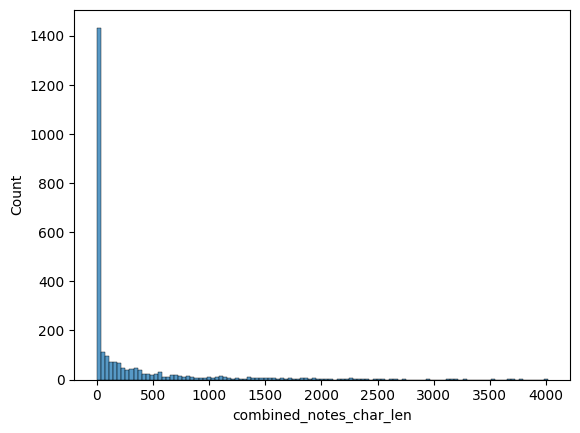

In [ ]:
# Distribution plot of combined_notes_word_count

sns.histplot(suhi_filtered_df['combined_notes_char_len'])
plt.show()

<ipython-input-22-9230cbf10086>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suhi_filtered_df['combined_notes_char_len_boxcox'], _ = stats.boxcox(suhi_filtered_df['combined_notes_char_len'] + 1)


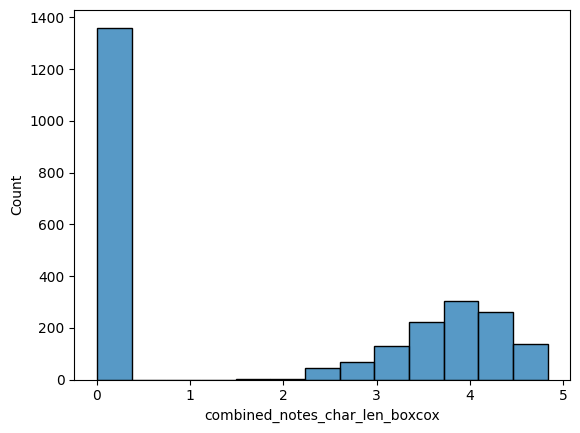

In [ ]:
# Apply log transformation on the data and get the ditrbution of the transformed data
suhi_filtered_df['combined_notes_char_len_boxcox'], _ = stats.boxcox(suhi_filtered_df['combined_notes_char_len'] + 1)
sns.histplot(suhi_filtered_df['combined_notes_char_len_boxcox'])
plt.show()

In [ ]:
# Distribution plot of combined_notes_word_count
sns.histplot(suhi_filtered_df['combined_notes_word_count'])
plt.show()

In [ ]:
# Plot the scatter plot of combined_notes_char_len with day_readmit as legend
sns.scatterplot(x='combined_notes_char_len', y='day_readmit', data=suhi_filtered_df)
plt.show()
sns.boxplot(x='day_readmit', y='combined_notes_char_len', data=suhi_filtered_df)
plt.show()

In [ ]:
# Plot the scatter plot of combined_notes_word_count with day_readmit as legend
sns.scatterplot(x='combined_notes_word_count', y='day_readmit', data=suhi_filtered_df)
plt.show()
sns.boxplot(x='day_readmit', y='combined_notes_word_count', data=suhi_filtered_df)
plt.show()

<ipython-input-26-0ebd22c0391f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suhi_filtered_df['residuals'] = suhi_filtered_df['combined_notes_char_len'] - group_means


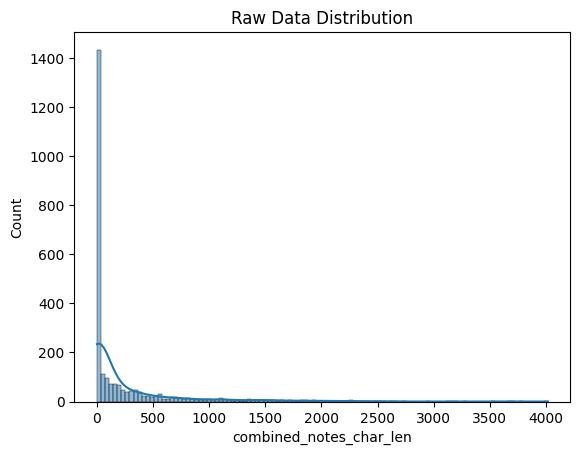

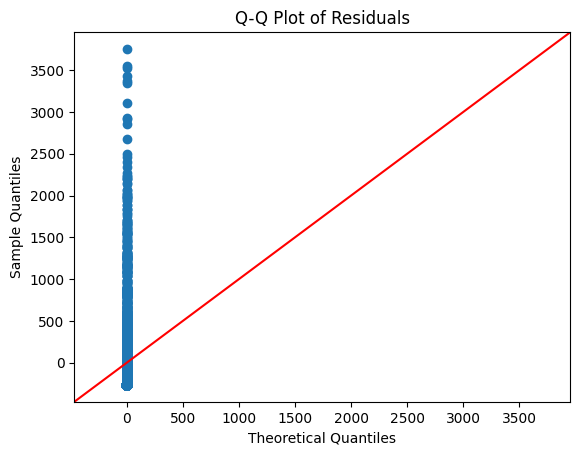

Shapiro test results on combined notes char length vs day_readmit:

Shapiro-Wilk Test p-value: 3.124141265145879e-61


In [ ]:
group_means = suhi_filtered_df.groupby('day_readmit')['combined_notes_char_len'].transform('mean')

# Step 2: Calculate residuals (difference between actual and group mean)
suhi_filtered_df['residuals'] = suhi_filtered_df['combined_notes_char_len'] - group_means

# Step 3: Plot raw data distribution
sns.histplot(suhi_filtered_df['combined_notes_char_len'], kde=True)
plt.title('Raw Data Distribution')
plt.show()

# Step 4: Plot residuals to check normality
sm.qqplot(suhi_filtered_df['residuals'], line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Step 5: Shapiro-Wilk test for residual normality
shapiro_test = stats.shapiro(suhi_filtered_df['residuals'])
print("Shapiro test results on combined notes char length vs day_readmit:\n")

print('Shapiro-Wilk Test p-value:', shapiro_test.pvalue)


In [ ]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test
groups = [suhi_filtered_df['combined_notes_char_len'][suhi_filtered_df['day_readmit'] == g] for g in suhi_filtered_df['day_readmit'].unique()]
kruskal_test = kruskal(*groups)
print("Kruskal test results on combined notes char length vs day_readmit:\n")

print(kruskal_test)

Kruskal test results on combined notes char length vs day_readmit:

KruskalResult(statistic=64.67346628681118, pvalue=8.839724702433007e-16)


In [ ]:
# # !pip install pingouin
# import pingouin as pg

# # Perform Welch's ANOVA
# welch_anova = pg.welch_anova(dv='combined_notes_char_len', between='day_readmit', data=suhi_filtered_df)
# print("Welch test results on combined notes char length vs day_readmit:\n")

# print(welch_anova)


## Patients readmitted but has longer notes

In [ ]:
# Get the combined_notes of a patient with day_readmit as 1 but combined_notes_char_len has notes longer than 2000
print("Patients readmitted but has longer notes - 2000+ char length in combined notes")
for note in suhi_filtered_df[(suhi_filtered_df['day_readmit'] == 1) & (suhi_filtered_df['combined_notes_char_len'] > 2000)]['combined_notes']:
  print(note)

Patients readmitted but has longer notes - 2000+ char length in combined notes
i spoke with pt who stated he has seen better days. pt was recently discharged from hch, but is doing better now. pt stated that he would like to participate in the csp program. in addition, he stated that he would like to receive food resources and utility payment assistance.  pt agreed with me checking in on him in next week.    i sent pt the information he requested:  https://app.nowpow.com/patient/erx/69m4ovhfnq. i spoke with pt, who stated that he was doing well. pt informed me that he didn't receive the text i sent him last week with the resources information. i will send him the information once again.    i retrieved the information and sent it to patient again.  5 min. i spoke with the patient, who stated that he was doing ok. pt said that he received the information i sent him and plans on applying for the resources he needs.  pt informed me that he would like someone to assist him in cutting his ve

In [ ]:
# Give me a string with complete notes concatenated
complete_notes_all_pts = ''
for note in suhi_filtered_df['combined_notes']:
  if len(note) > 0:
    complete_notes_all_pts += note + ' '

In [ ]:
complete_notes_all_pts

'emotional support looking for housing in the same and needs access to an elevator for her powered wheelchair.. the pt reached out to me to let me know she is currently back in the hospital. i reassured her that i\'m looking for housing for her. i spoke with the pt about where the status of her  cha application. sdoh/ emotional support. emotiional support/ case cloud check to see if pcp has returned and visit is made.. appointment has been set for pcp. pt stated she is ok- doesn\'t need any assistance-has pcp-job spoke with pt\'s son pedro, he stated he was at work and patient was at home, he asked me to call back  when he gets home, after 3:30. pt reached out to me, he stated he was on the street and couldn\'t talk at the moment. he stated he will call me back.. mr manuel called, he stated he was feeling well. he stated that he doesn\'t have a need from the chw support program at this time. he allowed me to ask him the sdoh questions and responded to all of them. i thanked mr manuel f

## Topic Modeling

In [ ]:
# !pip install gensim nltk


In [ ]:
import nltk
import gensim
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models import LdaModel, TfidfModel

# Download stopwords and punkt for tokenization
nltk.download('punkt')
nltk.download('stopwords')

# text string (input)
text = complete_notes_all_pts

# Preprocess the text
# 1. Preprocessing (Tokenization and stopwords removal)
stop_words = set(stopwords.words('english'))
additional_stopwords = ['pt', 'stated', 'patient', 'pleasant', 'pleased', 'call', 'spoke', 'called']  # Manually remove some frequent words
stop_words.update(additional_stopwords)

tokens = word_tokenize(text.lower())
tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# 2. Create a dictionary representation of the documents
dictionary = corpora.Dictionary([tokens])

# 3. Create a Bag of Words representation of the document
corpus = [dictionary.doc2bow(tokens)]

# 4. Apply LDA model
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=25)

# 5. Output the topics and words
topics = lda_model.print_topics(num_words=5)

# Print the discovered topics
for idx, topic in topics:
    print(f"Topic {idx+1}: {topic}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Topic 1: 0.000*"needs" + 0.000*"assistance" + 0.000*"week" + 0.000*"information" + 0.000*"back"
Topic 2: 0.014*"assistance" + 0.013*"week" + 0.012*"back" + 0.012*"needs" + 0.011*"information"
Topic 3: 0.000*"week" + 0.000*"assistance" + 0.000*"information" + 0.000*"able" + 0.000*"needs"
Topic 4: 0.000*"assistance" + 0.000*"week" + 0.000*"next" + 0.000*"number" + 0.000*"able"
Topic 5: 0.000*"assistance" + 0.000*"week" + 0.000*"phone" + 0.000*"needs" + 0.000*"back"
Topic 6: 0.000*"needs" + 0.000*"week" + 0.000*"assistance" + 0.000*"back" + 0.000*"asked"
Topic 7: 0.000*"back" + 0.000*"assistance" + 0.000*"needs" + 0.000*"week" + 0.000*"well"
Topic 8: 0.000*"information" + 0.000*"assistance" + 0.000*"week" + 0.000*"back" + 0.000*"needs"
Topic 9: 0.000*"assistance" + 0.000*"needs" + 0.000*"back" + 0.000*"week" + 0.000*"number"
Topic 10: 0.000*"week" + 0.000*"needs" + 0.000*"assistance" + 0.000*"well" + 0.000*"information"


In [ ]:
import nltk
import gensim
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models import LdaModel, TfidfModel

# Download stopwords and punkt for tokenization
nltk.download('punkt')
nltk.download('stopwords')

  # text string (input)
for note in suhi_filtered_df[(suhi_filtered_df['day_readmit'] == 1) & (suhi_filtered_df['combined_notes_char_len'] > 2000)]['combined_notes']:
  text = note

  # Preprocess the text
  # 1. Preprocessing (Tokenization and stopwords removal)
  stop_words = set(stopwords.words('english'))
  additional_stopwords = ['pt', 'stated', 'patient', 'pleasant', 'pleased', 'call', 'spoke', 'called']  # Manually remove some frequent words
  stop_words.update(additional_stopwords)

  tokens = word_tokenize(text.lower())
  tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

  # 2. Create a dictionary representation of the documents
  dictionary = corpora.Dictionary([tokens])

  # 3. Create a Bag of Words representation of the document
  corpus = [dictionary.doc2bow(tokens)]

  # 4. Apply LDA model
  lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=25)

  # 5. Output the topics and words
  topics = lda_model.print_topics(num_words=5)

  # Print the discovered topics
  print(50*'-')
  print(f"Notes: {note}")
  for idx, topic in topics:
      print(f"Topic {idx+1}: {topic}")


--------------------------------------------------
Notes: i spoke with pt who stated he has seen better days. pt was recently discharged from hch, but is doing better now. pt stated that he would like to participate in the csp program. in addition, he stated that he would like to receive food resources and utility payment assistance.  pt agreed with me checking in on him in next week.    i sent pt the information he requested:  https://app.nowpow.com/patient/erx/69m4ovhfnq. i spoke with pt, who stated that he was doing well. pt informed me that he didn't receive the text i sent him last week with the resources information. i will send him the information once again.    i retrieved the information and sent it to patient again.  5 min. i spoke with the patient, who stated that he was doing ok. pt said that he received the information i sent him and plans on applying for the resources he needs.  pt informed me that he would like someone to assist him in cutting his very long toenails; he 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


--------------------------------------------------
Notes: i spoke with pt's husband, samuel, who informed me that pt is in the hospital. i reviewed pt's record and confirmed that information.. i finally spoke with the patient, who said she felt better. i informed pt that i had worked with her at the end of last year, and she said that she remembered that. i asked pt if catholic charities reached out to her to assess her situation and provide her with the needed services. she said she had never heard from them. she told me that sometimes she doesn't answer the phone and could have missed their calls.  she said she still needs assistance with food and would like to be connected with home style direct; she used that food delivery service when she was in indiana.  i informed pt that she had missed several appointments, and she said that she was aware of that; she sometimes forgets she has scheduled doctor's appointments. i reiterated the importance of keeping her appointments to stay healt

In [ ]:
def topic_modeling(text):
  # 1. Preprocessing (Tokenization and stopwords removal)
  stop_words = set(stopwords.words('english'))
  additional_stopwords = ['pt', 'stated', 'patient', 'pleasant', 'pleased', 'call', 'spoke', 'called', 'back', 'get', 'able', 'phone', 'home', 'vm', 'sdoh', 'hospital']  # Manually remove some frequent words
  stop_words.update(additional_stopwords)

  tokens = word_tokenize(text.lower())
  tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

  # 2. Create a dictionary representation of the documents
  dictionary = corpora.Dictionary([tokens])

  # 3. Create a Bag of Words representation of the document
  corpus = [dictionary.doc2bow(tokens)]

  # 4. Apply LDA model
  lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=100, alpha=0.01, eta=0.01)

  # 5. Output the topics and words
  topics = lda_model.print_topics(num_words=5)

  # Print the discovered topics
  print(100*'-')
  for idx, topic in topics:
      print(f"Topic {idx+1}: {topic}")



## Segregating patients

In [ ]:
suhi_filtered_df['combined_notes_char_len_binned'].value_counts()

,count
combined_notes_char_len_binned,
"(-0.001, 100.0]",1618
"(100.0, 1000.0]",711
"(1000.0, 2000.0]",157
"(2000.0, 5000.0]",42


## Patients with variable notes length in chars and readmitted where each notes of each group of patients are concatenated

In [ ]:
readmitted_pts_short_notes = ''
for note in suhi_filtered_df[(suhi_filtered_df['day_readmit'] == 1) & (suhi_filtered_df['combined_notes_char_len_binned'] == pd.Interval(-0.001, 100.0, closed='right'))]['combined_notes']:
  readmitted_pts_short_notes += note + ' '
topic_modeling(readmitted_pts_short_notes)

----------------------------------------------------------------------------------------------------
Topic 1: 0.025*"readmitted" + 0.020*"unresponsive" + 0.020*"straight" + 0.020*"case" + 0.020*"went"
Topic 2: 0.007*"readmitted" + 0.007*"need" + 0.007*"unresponsive" + 0.007*"pts" + 0.007*"case"
Topic 3: 0.007*"readmitted" + 0.007*"went" + 0.007*"assistance" + 0.007*"straight" + 0.007*"number"


In [ ]:
readmitted_pts_medium_notes = ''
for note in suhi_filtered_df[(suhi_filtered_df['day_readmit'] == 1) & (suhi_filtered_df['combined_notes_char_len_binned'] == pd.Interval(100.0, 1000.0, closed='right'))]['combined_notes']:
  readmitted_pts_medium_notes += note + ' '
topic_modeling(readmitted_pts_medium_notes)

----------------------------------------------------------------------------------------------------
Topic 1: 0.001*"assistance" + 0.001*"needs" + 0.001*"well" + 0.001*"daughter" + 0.001*"week"
Topic 2: 0.013*"assistance" + 0.013*"needs" + 0.012*"number" + 0.010*"contact" + 0.010*"week"
Topic 3: 0.001*"needs" + 0.001*"number" + 0.001*"assistance" + 0.001*"week" + 0.001*"asked"


In [ ]:
readmitted_pts_long_notes = ''
for note in suhi_filtered_df[(suhi_filtered_df['day_readmit'] == 1) & (suhi_filtered_df['combined_notes_char_len_binned'] == pd.Interval(1000.0, 2000.0, closed='right'))]['combined_notes']:
  readmitted_pts_long_notes += note + ' '
topic_modeling(readmitted_pts_long_notes)

----------------------------------------------------------------------------------------------------
Topic 1: 0.001*"next" + 0.001*"information" + 0.001*"week" + 0.001*"informed" + 0.001*"appointment"
Topic 2: 0.015*"week" + 0.012*"informed" + 0.012*"would" + 0.012*"information" + 0.011*"next"
Topic 3: 0.001*"week" + 0.001*"informed" + 0.001*"appointment" + 0.001*"would" + 0.001*"needs"


In [ ]:
readmitted_pts_very_long_notes = ''
for note in suhi_filtered_df[(suhi_filtered_df['day_readmit'] == 1) & (suhi_filtered_df['combined_notes_char_len_binned'] == pd.Interval(2000.0, 5000.0, closed='right'))]['combined_notes']:
  readmitted_pts_very_long_notes += note + ' '
topic_modeling(readmitted_pts_very_long_notes)

----------------------------------------------------------------------------------------------------
Topic 1: 0.001*"said" + 0.001*"informed" + 0.001*"would" + 0.001*"information" + 0.001*"asked"
Topic 2: 0.015*"information" + 0.015*"asked" + 0.014*"said" + 0.014*"informed" + 0.014*"would"
Topic 3: 0.001*"informed" + 0.001*"week" + 0.001*"information" + 0.001*"would" + 0.001*"said"


In [ ]:
suhi_filtered_df[(suhi_filtered_df['day_readmit'] == 1) & (suhi_filtered_df['combined_notes_char_len_binned'] == pd.Interval(2000.0, 5000.0, closed='right'))]['combined_notes'].iloc[0]

"i spoke with pt who stated he has seen better days. pt was recently discharged from hch, but is doing better now. pt stated that he would like to participate in the csp program. in addition, he stated that he would like to receive food resources and utility payment assistance.  pt agreed with me checking in on him in next week.    i sent pt the information he requested:  https://app.nowpow.com/patient/erx/69m4ovhfnq. i spoke with pt, who stated that he was doing well. pt informed me that he didn't receive the text i sent him last week with the resources information. i will send him the information once again.    i retrieved the information and sent it to patient again.  5 min. i spoke with the patient, who stated that he was doing ok. pt said that he received the information i sent him and plans on applying for the resources he needs.  pt informed me that he would like someone to assist him in cutting his very long toenails; he mentioned that they are curving. pt said that he has an a

In [ ]:
suhi_filtered_df[(suhi_filtered_df['day_readmit'] == 0) & (suhi_filtered_df['combined_notes_char_len_binned'] == pd.Interval(2000.0, 5000.0, closed='right'))]['combined_notes'].iloc[0]

"spoke w/ pat who stated he is feeling good overall, he stated he has never seen a doctor until his recent hospitalization. pt is interested in receiving food pantries and bill payment assistance. pt also interested in receiving the hiv test kit.  20min. pt stated he is feeling much better. i informed him that i found food pantries and bill payment assistance resources. i emailed the information to pt.  https://app.nowpow.com/patient/erx/efjkt7ppnx/es  pt stated he received a call form a clinic regarding a doctor's appt. he gave me the # 708-780-9777. i will contact the clinic to find out services they offer to low income pts.  10 min. i informed pt i called the clinic that called him regarding an appt, i let him know he has an appt w/  access clinic tomorrow. he stated that he already saw the doctor in alivio clinic, he received  medicine and diabetes test strips. pt gave the phone to spouse maria, who confirmed the information, she mentioned that pt has f/u appt in alivio on june 3. 

In [ ]:
print('Topics on patients readmitted with variable lengths')
print(100*'*')
print('Readmitted_pts_short_notes:')
topic_modeling(readmitted_pts_short_notes)
print(100*'*')
print('Readmitted_pts_medium_notes:')
topic_modeling(readmitted_pts_medium_notes)
print(100*'*')
print('Readmitted_pts_long_notes:')
topic_modeling(readmitted_pts_long_notes)
print(100*'*')
print('Readmitted_pts_very_long_notes:')
topic_modeling(readmitted_pts_very_long_notes)


Topics on patients readmitted with variable lengths
****************************************************************************************************
Readmitted_pts_short_notes:
----------------------------------------------------------------------------------------------------
Topic 1: 0.025*"readmitted" + 0.020*"unresponsive" + 0.020*"straight" + 0.020*"case" + 0.020*"went"
Topic 2: 0.007*"readmitted" + 0.007*"number" + 0.007*"straight" + 0.007*"case" + 0.007*"pts"
Topic 3: 0.007*"pts" + 0.007*"readmitted" + 0.007*"number" + 0.007*"went" + 0.007*"need"
****************************************************************************************************
Readmitted_pts_medium_notes:
----------------------------------------------------------------------------------------------------
Topic 1: 0.001*"number" + 0.001*"needs" + 0.001*"assistance" + 0.001*"week" + 0.001*"reached"
Topic 2: 0.001*"assistance" + 0.001*"needs" + 0.001*"number" + 0.001*"contact" + 0.001*"week"
Topic 3: 0.013*"a

## Patients with variable notes length in chars and not readmitted

In [ ]:
not_readmitted_pts_short_notes = ''
for note in suhi_filtered_df[(suhi_filtered_df['day_readmit'] == 0) & (suhi_filtered_df['combined_notes_char_len_binned'] == pd.Interval(-0.001, 100.0, closed='right'))]['combined_notes']:
  not_readmitted_pts_short_notes += note + ' '
topic_modeling(not_readmitted_pts_short_notes)

----------------------------------------------------------------------------------------------------
Topic 1: 0.032*"number" + 0.028*"unable" + 0.027*"disconnected" + 0.025*"reach" + 0.019*"working"
Topic 2: 0.172*"say" + 0.172*"cida" + 0.172*"remains" + 0.002*"number" + 0.002*"disconnected"
Topic 3: 0.003*"number" + 0.003*"unable" + 0.003*"disconnected" + 0.003*"reach" + 0.003*"working"


In [ ]:
not_readmitted_pts_medium_notes = ''
for note in suhi_filtered_df[(suhi_filtered_df['day_readmit'] == 0) & (suhi_filtered_df['combined_notes_char_len_binned'] == pd.Interval(100.0, 1000.0, closed='right'))]['combined_notes']:
  not_readmitted_pts_medium_notes += note + ' '
topic_modeling(not_readmitted_pts_medium_notes)

----------------------------------------------------------------------------------------------------
Topic 1: 0.000*"needs" + 0.000*"assistance" + 0.000*"number" + 0.000*"case" + 0.000*"week"
Topic 2: 0.000*"assistance" + 0.000*"number" + 0.000*"needs" + 0.000*"provided" + 0.000*"week"
Topic 3: 0.019*"assistance" + 0.018*"needs" + 0.016*"number" + 0.015*"week" + 0.013*"contact"


In [ ]:
not_readmitted_pts_long_notes = ''
for note in suhi_filtered_df[(suhi_filtered_df['day_readmit'] == 0) & (suhi_filtered_df['combined_notes_char_len_binned'] == pd.Interval(1000.0, 2000.0, closed='right'))]['combined_notes']:
  not_readmitted_pts_long_notes += note + ' '
topic_modeling(not_readmitted_pts_long_notes)

----------------------------------------------------------------------------------------------------
Topic 1: 0.015*"informed" + 0.015*"information" + 0.014*"well" + 0.014*"week" + 0.012*"would"
Topic 2: 0.000*"week" + 0.000*"well" + 0.000*"information" + 0.000*"informed" + 0.000*"would"
Topic 3: 0.000*"well" + 0.000*"information" + 0.000*"assistance" + 0.000*"said" + 0.000*"informed"


In [ ]:
not_readmitted_pts_very_long_notes = ''
for note in suhi_filtered_df[(suhi_filtered_df['day_readmit'] == 0) & (suhi_filtered_df['combined_notes_char_len_binned'] == pd.Interval(2000.0, 5000.0, closed='right'))]['combined_notes']:
  not_readmitted_pts_very_long_notes += note + ' '
topic_modeling(not_readmitted_pts_very_long_notes)

In [ ]:
print('Topics on patients not readmitted with variable lengths')
print(100*'*')
print('Not_Readmitted_pts_short_notes:')
topic_modeling(not_readmitted_pts_short_notes)
print(100*'*')
print('Not_Readmitted_pts_medium_notes:')
topic_modeling(not_readmitted_pts_medium_notes)
print(100*'*')
print('Not_Readmitted_pts_long_notes:')
topic_modeling(not_readmitted_pts_long_notes)
print(100*'*')
print('Not_Readmitted_pts_very_long_notes:')
topic_modeling(not_readmitted_pts_very_long_notes)


Topics on patients not readmitted with variable lengths
****************************************************************************************************
Not_Readmitted_pts_short_notes:
----------------------------------------------------------------------------------------------------
Topic 1: 0.032*"number" + 0.028*"unable" + 0.027*"disconnected" + 0.025*"reach" + 0.019*"working"
Topic 2: 0.003*"disconnected" + 0.003*"unable" + 0.003*"number" + 0.003*"working" + 0.003*"straight"
Topic 3: 0.003*"reach" + 0.003*"number" + 0.003*"disconnected" + 0.003*"unable" + 0.003*"went"
****************************************************************************************************
Not_Readmitted_pts_medium_notes:
----------------------------------------------------------------------------------------------------
Topic 1: 0.000*"assistance" + 0.000*"needs" + 0.000*"week" + 0.000*"number" + 0.000*"contact"
Topic 2: 0.000*"needs" + 0.000*"assistance" + 0.000*"number" + 0.000*"provided" + 0.000

In [ ]:
# !pip install pyLDAvis
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models


# Make sure to download NLTK resources if not already done
# nltk.download('punkt')
# nltk.download('stopwords')

def topic_modeling(texts, vis_file_name, num_topics=2, passes=100):
    # 1. Preprocessing (Tokenization and stopwords removal)
    stop_words = set(stopwords.words('english'))
    additional_stopwords = [
        'pt', 'stated', 'patient', 'pleasant', 'pleased',
        'call', 'spoke', 'called', 'back', 'get', 'able',
        'phone', 'home', 'vm', 'sdoh', 'hospital',
        "assistance", "needs", "number", "week", "next",
        "informed", "information", "said", "week", "would",
        'asked', 'went', 'also', 'still'

    ]
    stop_words.update(additional_stopwords)

    # Tokenize the input texts
    all_tokens = []
    for text in texts:
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        all_tokens.append(tokens)

    # 2. Create a dictionary representation of the documents
    dictionary = corpora.Dictionary(all_tokens)

    # 3. Create a Bag of Words representation of the documents
    corpus = [dictionary.doc2bow(tokens) for tokens in all_tokens]

    # 4. Apply LDA model
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=passes, alpha=0.01, eta=0.01)

    # 5. Output the topics and words
    topics = lda_model.print_topics(num_words=5)

    # Print the discovered topics
    print(100 * '-')
    for idx, topic in topics:
        print(f"Topic {idx}: {topic}")

    # 6. Get topic distribution for each document
    print("\nDocument Topic Distribution:")
    topic_distribution_lst = []
    for i, doc in enumerate(corpus):
        topic_distribution = lda_model.get_document_topics(doc)
        topic_distribution_lst.append(topic_distribution)
        print(f"Document {i}: {topic_distribution}")


    # 7. Visualize the topics using pyLDAvis
    vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
    pyLDAvis.display(vis)
    pyLDAvis.save_html(vis, vis_file_name)  # Save as HTML
    print(f"Visualization saved as {vis_file_name}")
    return topic_distribution_lst



# Example usage with a list of texts
texts = [
    readmitted_pts_short_notes,
    readmitted_pts_medium_notes,
    readmitted_pts_long_notes,
    readmitted_pts_very_long_notes,
    not_readmitted_pts_short_notes,
    not_readmitted_pts_medium_notes,
    not_readmitted_pts_long_notes,
    not_readmitted_pts_very_long_notes
]
print('Topics on patients readmitted or not with variable lengths')
topic_modeling(texts, 'lda_visualization_var_lengths.html')

ModuleNotFoundError: No module named 'pyLDAvis'

In [ ]:
readmitted_pts_notes = readmitted_pts_very_long_notes + readmitted_pts_long_notes + readmitted_pts_medium_notes + readmitted_pts_short_notes
not_readmitted_pts_notes = not_readmitted_pts_very_long_notes + not_readmitted_pts_long_notes + not_readmitted_pts_medium_notes + not_readmitted_pts_short_notes

In [ ]:
admitted_texts = [readmitted_pts_notes, not_readmitted_pts_notes]
print('Topics on patients readmitted or not')
topic_modeling(admitted_texts, 'lda_visualization_admitted.html')

## Patients with variable notes length in chars and readmitted where each notes of each group of patients are considered as individual docs

In [ ]:
readmitted_pts_individual_notes = []
for note in suhi_filtered_df[(suhi_filtered_df['day_readmit'] == 1)]['combined_notes']:
  readmitted_pts_individual_notes.append(note)
print('Topics for readmitted patients, each patient notes as document using LDA')
topic_modeling(readmitted_pts_individual_notes, 'lda_visualization_var_lengths_not_concatenated.html')

In [ ]:
not_readmitted_pts_individual_notes = []
for note in suhi_filtered_df[(suhi_filtered_df['day_readmit'] == 0)]['combined_notes']:
  not_readmitted_pts_individual_notes.append(note)
print('Topics for not readmitted patients, each patient notes as document using LDA')
topic_modeling(not_readmitted_pts_individual_notes, 'lda_visualization_var_lengths_not_concatenated.html')

## All patients with notes are considered for Topic Modeling

In [ ]:
suhi_filtered_df['day_readmit'].value_counts()

,count
day_readmit,
0.0,1899
1.0,629


In [ ]:
suhi_filtered_df['non_null_empty'] = suhi_filtered_df['combined_notes'].apply(lambda x: x == '' or (isinstance(x, str) and x.isspace()))

<ipython-input-22-acc7c2a10e4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suhi_filtered_df['non_null_empty'] = suhi_filtered_df['combined_notes'].apply(lambda x: x == '' or (isinstance(x, str) and x.isspace()))


In [ ]:
suhi_filtered_df = suhi_filtered_df[suhi_filtered_df['non_null_empty'] == False]

In [ ]:
suhi_filtered_df = suhi_filtered_df.drop('non_null_empty', axis=1)

In [ ]:
suhi_filtered_df

,7,redcap_event_name,new_patient,type_id,chw_name,inperson_connection,sw_date,referral_date,referral_month,referral_source,...,sdoh_other,sdoh_other_notes,resources_other,resources_other_notes,no_resources_other,no_resources_other_other,sdoh_notes,nowpow,old_sdoh_questionnaire_complete,combined_notes
3,5,round_1_arm_1,1.0,1.0,2.0,NaN,4/12/2021,4/12/2021,2104.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2,emotional support
7,9,round_1_arm_1,1.0,1.0,2.0,NaN,4/12/2021,4/12/2021,2104.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2,looking for housing in the same and needs acce...
8,10,round_1_arm_1,1.0,1.0,2.0,NaN,4/12/2021,4/12/2021,2104.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2,sdoh/ emotional support. emotiional support/ c...
10,12,round_1_arm_1,1.0,1.0,4.0,NaN,4/12/2021,4/12/2021,2104.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,"Patients PCP is out of town, patient is waitin...",0.0,2,check to see if pcp has returned and visit is ...
11,12,round_2_arm_1,1.0,1.0,5.0,NaN,5/7/2021,5/14/2021,2105.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2,pt stated she is ok- doesn't need any assistan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,2262,round_1_arm_1,1.0,1.0,2.0,0.0,1/9/2024,1/15/2024,2401.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,i was able to follow up with the pt. she state...
2572,2274,round_1_arm_1,1.0,1.0,2.0,0.0,1/19/2024,1/25/2024,2401.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,i reached out to the pt and their phone went s...
2574,2276,round_1_arm_1,1.0,1.0,4.0,0.0,1/19/2024,1/25/2024,2401.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,vm is not set up.. vm is not set up.
2575,2277,round_1_arm_1,1.0,1.0,4.0,0.0,1/19/2024,1/25/2024,2401.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,phone rang for a while and went to a busy sign...


In [ ]:
pts_individual_notes = []
for note in suhi_filtered_df['combined_notes']:
  pts_individual_notes.append(note)
print('Topics for all patients, each patient notes as document using LDA')
topic_distribution_lst = topic_modeling(pts_individual_notes, 'pts_individual_notes.html')

In [ ]:
records = []
for idx, distribution in enumerate(topic_distribution_lst):
    record = {'Document_ID': idx}
    for topic, prob in distribution:
        record[f'Topic_{topic}'] = prob
    records.append(record)

# Create DataFrame from the records
topic_df = pd.DataFrame(records)

# Fill NaN values with 0 for any missing topic probabilities
topic_df = topic_df.fillna(0)

In [ ]:
# Reset index
suhi_filtered_df = suhi_filtered_df.reset_index(drop=True)

In [ ]:
topic_lda_merged_df = pd.concat([suhi_filtered_df, topic_df], axis=1)

In [ ]:
topic_lda_merged_df

In [ ]:
# Get the average of Topic_0 and Topic_1 for both readmit value as 0 and 1
topic_lda_merged_df.groupby('day_readmit')[['Topic_0', 'Topic_1']].mean()

In [ ]:
topic_lda_merged_df.to_csv('/content/drive/MyDrive/SUHI/Results/topic_lda_merged_df.csv', index=False)

## Biterm Topic Model - Bitermplus

In [ ]:
!pip install bitermplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.4/264.4 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for bitermplus: filename=bitermplus-0.7.0-cp310-cp310-linux_x86_64.whl size=982444 sha256=3f79d942a5d473d3252fef898be25417a4f0242445f62f61abbd4fb62cde979c
  Stored in directory: /root/.cache/pip/wheels/3a/3d/f0/8209806aa8794d9825983c2e755ccb232cf112b8ffc4cbadc4
Successfully built bitermplus


In [ ]:
# Remove all the records of combined_notes when it does not has any content like either null or empty records
suhi_filtered_df = suhi_filtered_df[suhi_filtered_df['combined_notes'].notna()]
suhi_filtered_df['combined_notes'].value_counts()

,count
combined_notes,
closed case,15
declined services,7
declined services,5
closed case,3
patient declined service.,2
...,...
did not call saw in meditech that patient is currently admitted to hch. patient health is declining hospice was recommended but wife declined. will not call.,1
phone disconnected,1
assisted pt with scheduling ride to dr appt. also informed pt about superior transport service and provided pt with contact information. pt stated he has a case manager and has no other needs at this time.,1


In [ ]:
import bitermplus as btm
import numpy as np
import pandas as pd
import nltk

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


# Define domain-specific stop words
domain_stop_words = {"pt", "stated", "spoke", "called"}

# Combine general and domain-specific stop words
general_stop_words = set(stopwords.words('english')).union(ENGLISH_STOP_WORDS)
all_stop_words = general_stop_words.union(domain_stop_words)

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()


# Function to preprocess and remove stop words
def preprocess_text(text):
    tokens = text.split()  # Tokenize text
    cleaned_tokens = [word for word in tokens if word.lower() not in all_stop_words]
    processed_tokens = [lemmatizer.lemmatize(word) for word in cleaned_tokens]

    return " ".join(processed_tokens)

# Patient notes
texts = suhi_filtered_df['combined_notes'].str.strip().apply(preprocess_text).tolist()


# # patient notes
# texts = suhi_filtered_df['combined_notes'].str.strip().tolist()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# obtaining terms frequency in a sparse matrix and corpus vocabulary
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)
tf = np.array(X.sum(axis=0)).ravel()

In [ ]:
# Vectorizing documents
docs_vec = btm.get_vectorized_docs(texts, vocabulary)
docs_lens = list(map(len, docs_vec))


In [ ]:
# Generating biterms
biterms = btm.get_biterms(docs_vec)


In [ ]:
# INITIALIZING AND RUNNING MODEL
perplexity_scores_list = []
for topic in range(1,50):
  print('Topic: ', topic)
  model = btm.BTM(
      X, vocabulary, seed=12321, T=topic, M=20, alpha=50/8, beta=0.01)
  model.fit(biterms, iterations=100)
  p_zd = model.transform(docs_vec)

  # METRICS
  perplexity = model.perplexity_
  perplexity_scores_list.append(perplexity)
  print('Perplexity: ', perplexity)
  coherence = model.coherence_
  print('Coherence: ', coherence)
  # LABELS
  model.labels_

Topic:  1


100%|██████████| 1226/1226 [00:00<00:00, 80446.44it/s]


Perplexity:  2688.0617766884175
Coherence:  [-245.64648721]
Topic:  2


100%|██████████| 1226/1226 [00:00<00:00, 66989.97it/s]


Perplexity:  2222.778396850916
Coherence:  [-229.53820136 -279.56934774]
Topic:  3


100%|██████████| 1226/1226 [00:00<00:00, 67196.56it/s]


Perplexity:  1984.0610269735575
Coherence:  [-268.37112576 -237.8355053  -231.86064473]
Topic:  4


 48%|████▊     | 48/100 [00:01<00:01, 44.04it/s]


KeyboardInterrupt: 

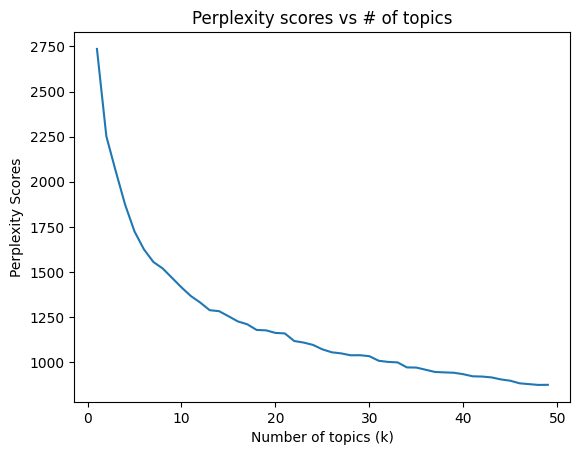

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, 50), perplexity_scores_list)
plt.title('Perplexity scores vs # of topics')
plt.xlabel('Number of topics (k)')
plt.ylabel('Perplexity Scores')
plt.show()

In [ ]:
# INITIALIZING AND RUNNING MODEL
perplexity_scores_list = []
for iteration in range(50,500,50):
  print('Iteration: ', iteration)
  model = btm.BTM(
      X, vocabulary, seed=12321, T=13, M=20, alpha=50/8, beta=0.01)
  model.fit(biterms, iterations=iteration)
  p_zd = model.transform(docs_vec)

  # METRICS
  perplexity = model.perplexity_
  perplexity_scores_list.append(perplexity)
  print('Perplexity: ', perplexity)
  coherence = model.coherence_
  print('Coherence: ', coherence)
  # LABELS
  model.labels_

Iteration:  50


100%|██████████| 2528/2528 [00:00<00:00, 36710.74it/s]


Perplexity:  1313.66024121437
Coherence:  [-330.84285305 -346.66201364 -286.09164272 -255.90722657 -351.39291088
 -301.21076751 -266.42815496 -281.8508099  -244.69408823 -283.37178503
 -223.22453954 -335.47788268 -237.54801466]
Iteration:  100


100%|██████████| 2528/2528 [00:00<00:00, 50438.59it/s]


Perplexity:  1288.779595147104
Coherence:  [-331.42371719 -361.4228689  -279.15475537 -240.54605943 -341.62066025
 -331.05796919 -237.81222422 -292.95096325 -246.61256988 -307.01401692
 -221.99231214 -363.05696756 -240.88506847]
Iteration:  150


100%|██████████| 2528/2528 [00:00<00:00, 47528.59it/s]


Perplexity:  1277.1787294100702
Coherence:  [-331.95921928 -328.87346114 -297.50010248 -231.3371786  -364.76983827
 -329.16261472 -241.39431207 -288.64991282 -278.88334476 -306.0587428
 -277.04487635 -375.63422527 -242.67504805]
Iteration:  200


100%|██████████| 2528/2528 [00:00<00:00, 56028.66it/s]


Perplexity:  1271.7009939575196
Coherence:  [-333.03720575 -302.40649739 -283.71100081 -249.27128962 -381.10906275
 -321.0161399  -251.27955866 -297.80434011 -248.7644981  -307.89884558
 -277.29030243 -372.83474504 -245.90364769]
Iteration:  250


100%|██████████| 2528/2528 [00:00<00:00, 19495.37it/s]


Perplexity:  1267.1340585487355
Coherence:  [-331.60865605 -300.02973298 -284.01073457 -261.87128095 -358.40565479
 -354.43550475 -220.92169846 -288.3301071  -249.8285693  -306.77606016
 -236.62171943 -397.58409776 -235.26243909]
Iteration:  300


100%|██████████| 2528/2528 [00:00<00:00, 55364.28it/s]


Perplexity:  1265.5637144973584
Coherence:  [-332.13385611 -287.25523098 -284.1060265  -225.93565529 -361.51020987
 -328.32198765 -252.47570638 -298.53008809 -227.39483431 -308.16830082
 -242.96709676 -404.3926001  -228.03004267]
Iteration:  350


100%|██████████| 2528/2528 [00:00<00:00, 57680.01it/s]


Perplexity:  1263.0623753079806
Coherence:  [-330.9333674  -281.01098404 -290.07468289 -253.91801728 -375.75436726
 -371.02823786 -249.09423819 -318.39482302 -243.61814782 -264.75211796
 -238.964064   -410.70922137 -235.01216854]
Iteration:  400


100%|██████████| 2528/2528 [00:00<00:00, 49263.82it/s]


Perplexity:  1262.7344429673688
Coherence:  [-331.14235772 -254.68382776 -293.72044107 -226.9957107  -365.04224369
 -370.44803216 -269.33265183 -300.49806988 -255.39739657 -309.83354404
 -234.53492885 -342.8698221  -236.33098796]
Iteration:  450


100%|██████████| 2528/2528 [00:00<00:00, 30883.86it/s]


Perplexity:  1262.0331101843155
Coherence:  [-331.90315987 -253.51816042 -293.9232911  -254.07781158 -369.21250511
 -340.48915647 -243.25102676 -302.40070288 -246.95740261 -285.05788278
 -234.50589793 -374.69769205 -232.83621767]


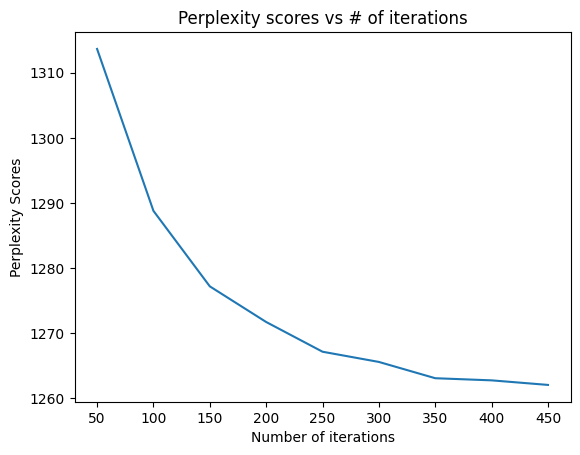

In [ ]:
plt.plot(range(50,500,50), perplexity_scores_list)
plt.title('Perplexity scores vs # of iterations')
plt.xlabel('Number of iterations')
plt.ylabel('Perplexity Scores')
plt.show()

In [ ]:
# INITIALIZING AND RUNNING MODEL
model = btm.BTM(
    X, vocabulary, seed=12321, T=13, M=20, alpha=50/13, beta=0.8)
model.fit(biterms, iterations=10)
p_zd = model.transform(docs_vec)

# METRICS
perplexity = model.perplexity_
print('Perplexity: ', perplexity)
coherence = model.coherence_
print('Coherence: ', coherence)
# LABELS
model.labels_

100%|██████████| 1522/1522 [00:00<00:00, 12729.40it/s]


Perplexity:  882.7776945980382
Coherence:  [-287.69544872 -237.66015677 -263.5882958  -284.4719949  -390.01153339
 -265.91067853 -243.74780262 -317.86390173 -210.92208593 -283.34619865
 -293.55674219 -313.95666199 -242.58497506]


array([ 9,  9, 10, ...,  6,  8, 12])

In [ ]:
print(perplexity,coherence)

882.7776945980382 [-287.69544872 -237.66015677 -263.5882958  -284.4719949  -390.01153339
 -265.91067853 -243.74780262 -317.86390173 -210.92208593 -283.34619865
 -293.55674219 -313.95666199 -242.58497506]


In [ ]:
btm.get_docs_top_topic(texts, model.matrix_docs_topics_)['label'].value_counts()

,count
label,
6,333
12,265
5,164
9,128
1,108
8,98
7,95
0,87
10,69


In [ ]:
# Number of top words to display per topic
top_n = 10

# Extracting the topic-word distribution matrix
topic_word_matrix = model.matrix_topics_words_

# Displaying top words for each topic
for topic_idx, topic_dist in enumerate(topic_word_matrix):
    # Get indices of top N words for this topic
    top_word_indices = topic_dist.argsort()[-top_n:][::-1]
    # Map indices to actual words in vocabulary
    top_words = [vocabulary[i] for i in top_word_indices]
    print(f"Topic {topic_idx}: {', '.join(top_words)}")

Topic 0: catholic, charity, need, transportation, assistance, asked, information, resource, utility, told
Topic 1: informed, need, information, patient, said, help, pcp, agreed, appt, social
Topic 2: patient, like, referral, information, pcp, need, sent, appointment, informed, health
Topic 3: said, asked, patient, informed, number, need, appointment, gave, answer, pcp
Topic 4: patient, informed, sent, service, like, office, need, appt, info, mary
Topic 5: contact, need, assistance, provided, case, number, week, resource, close, try
Topic 6: reached, able, left, received, phone, pt, know, vm, let, information
Topic 7: patient, home, need, care, able, asked, assistance, know, sw, number
Topic 8: information, food, said, sent, informed, mentioned, agreed, asked, like, help
Topic 9: need, asked, number, daughter, patient, phone, sister, able, home, son
Topic 10: need, able, patient, state, asked, contact, information, appointment, let, reached
Topic 11: sent, information, need, assistance,

In [ ]:
# Document-topic probabilities
doc_topic_probs = pd.DataFrame(p_zd, columns=[f"Topic {i}" for i in range(p_zd.shape[1])])
print(doc_topic_probs.head())  # Display the first few rows

    Topic 0   Topic 1   Topic 2   Topic 3   Topic 4   Topic 5   Topic 6  \
0  0.000993  0.000376  0.006401  0.000325  0.001048  0.037519  0.203662   
1  0.143260  0.024702  0.107343  0.001289  0.015761  0.042895  0.114094   
2  0.033693  0.012825  0.044679  0.010007  0.071179  0.074176  0.202396   
3  0.014465  0.038667  0.021863  0.014671  0.015058  0.070331  0.139903   
4  0.051141  0.006575  0.019149  0.001347  0.008880  0.039471  0.164824   

    Topic 7   Topic 8   Topic 9  Topic 10  Topic 11  Topic 12  
0  0.014034  0.000461  0.413059  0.118397  0.019914  0.183811  
1  0.124652  0.016343  0.232503  0.141389  0.004529  0.031240  
2  0.095957  0.042374  0.072297  0.207044  0.102984  0.030388  
3  0.059530  0.021463  0.294820  0.069480  0.056281  0.183467  
4  0.312205  0.000195  0.202296  0.156280  0.019308  0.018329  


In [ ]:
doc_topic_probs

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12
0,0.000993,0.000376,0.006401,0.000325,0.001048,0.037519,0.203662,0.014034,0.000461,0.413059,0.118397,0.019914,0.183811
1,0.143260,0.024702,0.107343,0.001289,0.015761,0.042895,0.114094,0.124652,0.016343,0.232503,0.141389,0.004529,0.031240
2,0.033693,0.012825,0.044679,0.010007,0.071179,0.074176,0.202396,0.095957,0.042374,0.072297,0.207044,0.102984,0.030388
3,0.014465,0.038667,0.021863,0.014671,0.015058,0.070331,0.139903,0.059530,0.021463,0.294820,0.069480,0.056281,0.183467
4,0.051141,0.006575,0.019149,0.001347,0.008880,0.039471,0.164824,0.312205,0.000195,0.202296,0.156280,0.019308,0.018329
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,0.025423,0.022168,0.025875,0.337170,0.024980,0.065738,0.119083,0.053142,0.027937,0.137304,0.039533,0.049755,0.071892
1518,0.096936,0.069956,0.012575,0.002462,0.011815,0.257851,0.027680,0.009873,0.276732,0.031973,0.014334,0.186126,0.001686
1519,0.027810,0.011315,0.011595,0.002817,0.001553,0.064964,0.572668,0.005460,0.018638,0.048011,0.054586,0.025826,0.154757
1520,0.054258,0.115087,0.013257,0.006385,0.016592,0.163844,0.025508,0.021527,0.401491,0.026530,0.016510,0.137423,0.001585


In [ ]:
# Normalize topic-word probabilities to ensure they sum to 1 for each topic
topic_word_probs = topic_word_matrix / topic_word_matrix.sum(axis=1, keepdims=True)

# Display top words with their probabilities for each topic
for topic_idx, topic_dist in enumerate(topic_word_probs):
    # Get indices of top N words for this topic
    top_word_indices = topic_dist.argsort()[-top_n:][::-1]
    # Map indices to actual words in vocabulary and their probabilities
    top_words_probs = [(vocabulary[i], topic_dist[i]) for i in top_word_indices]
    print(f"Topic {topic_idx}:")
    for word, prob in top_words_probs:
        print(f"  {word}: {prob:.4f}")

Topic 0:
  catholic: 0.0307
  charity: 0.0260
  need: 0.0248
  transportation: 0.0212
  assistance: 0.0188
  asked: 0.0171
  information: 0.0145
  resource: 0.0131
  utility: 0.0130
  told: 0.0128
Topic 1:
  informed: 0.0333
  need: 0.0215
  information: 0.0169
  patient: 0.0168
  said: 0.0161
  help: 0.0140
  pcp: 0.0132
  agreed: 0.0131
  appt: 0.0129
  social: 0.0119
Topic 2:
  patient: 0.0251
  like: 0.0200
  referral: 0.0177
  information: 0.0159
  pcp: 0.0139
  need: 0.0121
  sent: 0.0116
  appointment: 0.0110
  informed: 0.0109
  health: 0.0099
Topic 3:
  said: 0.0264
  asked: 0.0256
  patient: 0.0246
  informed: 0.0190
  number: 0.0152
  need: 0.0131
  appointment: 0.0088
  gave: 0.0080
  answer: 0.0079
  pcp: 0.0075
Topic 4:
  patient: 0.0135
  informed: 0.0104
  sent: 0.0102
  service: 0.0098
  like: 0.0095
  office: 0.0088
  need: 0.0085
  appt: 0.0082
  info: 0.0080
  mary: 0.0076
Topic 5:
  contact: 0.0472
  need: 0.0308
  assistance: 0.0271
  provided: 0.0259
  case: 0.02

In [ ]:
model.labels_

array([ 9,  9, 10, ...,  6,  8, 12])

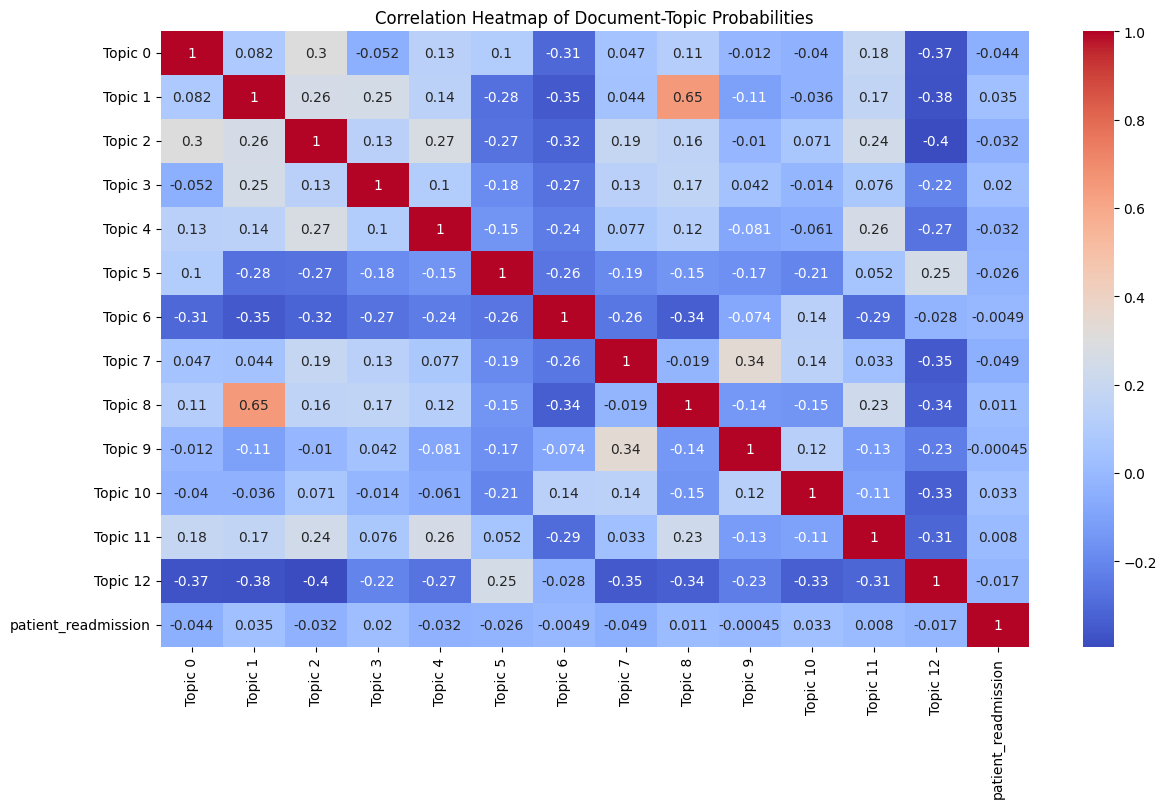

In [ ]:
doc_topic_probs['patient_readmission'] = suhi_filtered_df['day_readmit']
plt.figure(figsize=(14, 8))
sns.heatmap(doc_topic_probs.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Document-Topic Probabilities')
# Change the size of the plot
plt.show()

In [ ]:
suhi_filtered_df['topic_model_labels'] = model.labels_

In [ ]:
pd.crosstab(suhi_filtered_df['topic_model_labels'],suhi_filtered_df['day_readmit'])

day_readmit,0.0,1.0
topic_model_labels,,
0,74,13
1,87,21
2,46,13
3,39,14
4,26,7
5,147,17
6,274,59
7,75,20
8,88,10


In [ ]:
pd.crosstab(suhi_filtered_df['topic_model_labels'],suhi_filtered_df['day_readmit'], normalize='all')

day_readmit,0.0,1.0
topic_model_labels,,
0,0.048620,0.008541
1,0.057162,0.013798
2,0.030223,0.008541
3,0.025624,0.009198
4,0.017083,0.004599
5,0.096583,0.011170
6,0.180026,0.038765
7,0.049277,0.013141
8,0.057819,0.006570


In [ ]:
pd.crosstab(suhi_filtered_df['topic_model_labels'],suhi_filtered_df['day_readmit'], normalize='index')

day_readmit,0.0,1.0
topic_model_labels,,
0,0.850575,0.149425
1,0.805556,0.194444
2,0.779661,0.220339
3,0.735849,0.264151
4,0.787879,0.212121
5,0.896341,0.103659
6,0.822823,0.177177
7,0.789474,0.210526
8,0.897959,0.102041


In [ ]:
suhi_filtered_df['topic_model_labels'].corr(suhi_filtered_df['day_readmit'])

-0.006413747512509754

In [ ]:
suhi_filtered_df['day_readmit'].value_counts()

,7,redcap_event_name,new_patient,type_id,chw_name,inperson_connection,sw_date,referral_date,referral_month,referral_source,...,resources_other_notes,no_resources_other,no_resources_other_other,sdoh_notes,nowpow,old_sdoh_questionnaire_complete,combined_notes,combined_notes_char_len,combined_notes_word_count,topic_model_labels
0,2,round_1_arm_1,0.0,1.0,3.0,NaN,4/12/2021,4/12/2021,2104.0,1.0,...,NaN,NaN,NaN,NaN,NaN,2,,0,0,0
2,4,round_1_arm_1,1.0,1.0,2.0,NaN,4/12/2021,4/12/2021,2104.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0,,0,0,0
3,5,round_1_arm_1,1.0,1.0,2.0,NaN,4/12/2021,4/12/2021,2104.0,1.0,...,NaN,NaN,NaN,NaN,0.0,2,emotional support,17,2,2
4,5,round_2_arm_1,0.0,1.0,2.0,NaN,9/21/2021,9/23/2021,2109.0,1.0,...,NaN,NaN,NaN,NaN,0.0,2,,0,0,0
5,6,round_1_arm_1,1.0,1.0,2.0,NaN,4/12/2021,4/12/2021,2104.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0,,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,2276,round_1_arm_1,1.0,1.0,4.0,0.0,1/19/2024,1/25/2024,2401.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0,vm is not set up.. vm is not set up.,36,10,5
2575,2277,round_1_arm_1,1.0,1.0,4.0,0.0,1/19/2024,1/25/2024,2401.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0,phone rang for a while and went to a busy sign...,110,22,5
2577,2279,round_1_arm_1,1.0,1.0,2.0,0.0,1/19/2024,1/25/2024,2401.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0,,0,0,0
2589,2290,round_1_arm_1,1.0,1.0,4.0,0.0,1/26/2024,1/30/2024,2401.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0,,0,0,0


## Classification

In [ ]:
# # Convert numerical feature to categorical
# suhi_filtered_df['topic_model_labels'] = suhi_filtered_df['topic_model_labels'].astype('category')

# # Encode categorical feature
# suhi_filtered_df['topic_model_labels'] = suhi_filtered_df['topic_model_labels'].cat.codes

# Define features and target
X = doc_topic_probs
y = suhi_filtered_df['day_readmit']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Classifier
clf = RandomForestClassifier(random_state=42, class_weight="balanced")
clf.fit(X_train, y_train)

# Predictions
# y_pred = clf.predict(X_test)
threshold = 0.40
y_pred = (clf.predict_proba(X_test)[:, 1] > threshold).astype(int)

y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Compute AUC
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
auc = roc_auc_score(y_test_binarized, y_pred_prob)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.83
Accuracy: 0.83
F1 Score: 0.09
AUC: 0.49

Confusion Matrix:
[[374  20]
 [ 59   4]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       394
         1.0       0.17      0.06      0.09        63

    accuracy                           0.83       457
   macro avg       0.52      0.51      0.50       457
weighted avg       0.77      0.83      0.79       457



In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
from sklearn.preprocessing import LabelBinarizer

# Convert numerical feature to categorical
suhi_filtered_df['topic_model_labels'] = suhi_filtered_df['topic_model_labels'].astype('category')

# Encode categorical feature
suhi_filtered_df['topic_model_labels'] = suhi_filtered_df['topic_model_labels'].cat.codes

# Define features and target
X = suhi_filtered_df[['topic_model_labels']]
y = suhi_filtered_df['day_readmit']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Classifier
clf = RandomForestClassifier(random_state=42, class_weight="balanced")
clf.fit(X_train, y_train)

# Predictions
# y_pred = clf.predict(X_test)
threshold = 0.48
y_pred = (clf.predict_proba(X_test)[:, 1] > threshold).astype(int)

y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Compute AUC
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
auc = roc_auc_score(y_test_binarized, y_pred_prob)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Accuracy: 0.44
Accuracy: 0.44
F1 Score: 0.26
AUC: 0.54

Confusion Matrix:
[[158 236]
 [ 18  45]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.40      0.55       394
         1.0       0.16      0.71      0.26        63

    accuracy                           0.44       457
   macro avg       0.53      0.56      0.41       457
weighted avg       0.80      0.44      0.51       457



In [ ]:
suhi_filtered_df_clf = suhi_filtered_df[suhi_filtered_df.columns[1:88]]

In [ ]:
# Append a dataframe with other as additional columns
suhi_filtered_df_clf = pd.concat([suhi_filtered_df_clf.reset_index(drop=True), doc_topic_probs.reset_index(drop=True)], axis=1)

In [ ]:
suhi_filtered_df_clf

,age,sum_contact_attempts_calc,contact_attempts,day_readmit,total_time_spent,Visit_Number,Count_of_visit,comorbidity,sumComorbidities,time_spent_1,...,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,patient_readmission
0,61.0,NaN,4.0,0.0,50.0,1,2,0,0.0,35.0,...,0.001048,0.037519,0.203662,0.014034,0.000461,0.413059,0.118397,0.019914,0.183811,NaN
1,73.0,NaN,3.0,0.0,21.0,1,1,0,0.0,13.0,...,0.015761,0.042895,0.114094,0.124652,0.016343,0.232503,0.141389,0.004529,0.031240,NaN
2,61.0,NaN,7.0,1.0,240.0,1,1,1,1.0,120.0,...,0.071179,0.074176,0.202396,0.095957,0.042374,0.072297,0.207044,0.102984,0.030388,NaN
3,57.0,NaN,3.0,0.0,50.0,1,1,1,1.0,40.0,...,0.015058,0.070331,0.139903,0.059530,0.021463,0.294820,0.069480,0.056281,0.183467,0.0
4,69.0,NaN,3.0,1.0,20.0,1,1,0,0.0,20.0,...,0.008880,0.039471,0.164824,0.312205,0.000195,0.202296,0.156280,0.019308,0.018329,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,38.0,2.0,3.0,0.0,21.0,1,1,1,2.0,13.0,...,0.024980,0.065738,0.119083,0.053142,0.027937,0.137304,0.039533,0.049755,0.071892,NaN
1518,26.0,5.0,3.0,0.0,21.0,1,1,0,0.0,13.0,...,0.011815,0.257851,0.027680,0.009873,0.276732,0.031973,0.014334,0.186126,0.001686,0.0
1519,60.0,3.0,3.0,0.0,21.0,1,1,0,0.0,13.0,...,0.001553,0.064964,0.572668,0.005460,0.018638,0.048011,0.054586,0.025826,0.154757,0.0
1520,35.0,5.0,3.0,0.0,21.0,1,1,1,1.0,13.0,...,0.016592,0.163844,0.025508,0.021527,0.401491,0.026530,0.016510,0.137423,0.001585,0.0


In [ ]:
# Add topic_model_lables field to this df
# suhi_filtered_df_clf['topic_model_labels'] = model.labels_

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
from sklearn.preprocessing import LabelBinarizer


# Generate a dataset
X, y =  suhi_filtered_df_clf.drop('day_readmit', axis=1), suhi_filtered_df_clf['day_readmit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)


# Predictions
# y_pred = clf.predict(X_test)
threshold = 0.25
y_pred = (clf.predict_proba(X_test)[:, 1] > threshold).astype(int)

y_pred_prob = clf.predict_proba(X_test)[:, 1]


# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Compute AUC
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
auc = roc_auc_score(y_test_binarized, y_pred_prob)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.79
F1 Score: 0.36
AUC: 0.69

Confusion Matrix:
[[223  41]
 [ 23  18]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87       264
         1.0       0.31      0.44      0.36        41

    accuracy                           0.79       305
   macro avg       0.61      0.64      0.62       305
weighted avg       0.83      0.79      0.81       305



In [ ]:
# Fill null values using mean of the feature in only age column
suhi_filtered_df_clf['age'] = suhi_filtered_df_clf['age'].fillna(suhi_filtered_df_clf['age'].mean())
# Fill null values using value 0 in sum_contact_attempts_calc
suhi_filtered_df_clf['sum_contact_attempts_calc'] = suhi_filtered_df_clf['sum_contact_attempts_calc'].fillna(0)

<ipython-input-94-c58b951c1433>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suhi_filtered_df_clf['age'] = suhi_filtered_df_clf['age'].fillna(suhi_filtered_df_clf['age'].mean())
<ipython-input-94-c58b951c1433>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suhi_filtered_df_clf['sum_contact_attempts_calc'] = suhi_filtered_df_clf['sum_contact_attempts_calc'].fillna(0)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    precision_recall_curve,
    confusion_matrix,
    classification_report,
    make_scorer
)
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Data Preprocessing
X = suhi_filtered_df_clf.drop('day_readmit', axis=1)
y = suhi_filtered_df_clf['day_readmit']

# Handle missing values (example: filling with mean)
X.fillna(X.mean(), inplace=True)

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'max_features': ['sqrt', 'log2', None]  # Adding max_features for optimization
}

# Use F1 score as the scoring metric
scorer = make_scorer(f1_score)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring=scorer,
    cv=2,
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_model = grid_search.best_estimator_

# Model Calibration
calibrated_model = CalibratedClassifierCV(best_model, method='sigmoid', cv='prefit')
calibrated_model.fit(X_train_resampled, y_train_resampled)

# Predictions with optimized threshold
y_pred_prob = calibrated_model.predict_proba(X_test)[:, 1]

# Determine the optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Final predictions using optimal threshold
y_pred = (y_pred_prob > optimal_threshold).astype(int)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print("Best Parameters:", grid_search.best_params_)
print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.scatter(recall[np.argmax(f1_scores)], precision[np.argmax(f1_scores)], color='red', label='Optimal Threshold')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# Plot ROC Curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(calibrated_model, X_test, y_test)
plt.title("ROC Curve")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Fitting 2 folds for each of 972 candidates, totalling 1944 fits


KeyboardInterrupt: 

In [ ]:
suhi_filtered_df_clf

,age,sum_contact_attempts_calc,contact_attempts,day_readmit,total_time_spent,Visit_Number,Count_of_visit,comorbidity,sumComorbidities,time_spent_1,...,sdoh_emotional_na,healthedneeds_0.0,healthedneeds_1.0,sdoh_yesno_0.0,sdoh_yesno_1.0,any_unmet_needs_0.0,any_unmet_needs_1.0,any_unmet_needs_na,referrals_yesno_0.0,referrals_yesno_1.0
3,61.0,0.0,4.0,0.0,50.0,1,2,0,0.0,35.0,...,0,1,0,0,1,1,0,0,1,0
6,73.0,0.0,3.0,0.0,21.0,1,1,0,0.0,13.0,...,1,1,0,0,1,1,0,0,0,1
7,61.0,0.0,7.0,1.0,240.0,1,1,1,1.0,120.0,...,0,1,0,0,1,1,0,0,0,1
8,57.0,0.0,3.0,0.0,50.0,1,1,1,1.0,40.0,...,0,1,0,0,1,1,0,0,1,0
9,69.0,0.0,3.0,1.0,20.0,1,1,0,0.0,20.0,...,0,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,38.0,2.0,3.0,0.0,21.0,1,1,1,2.0,13.0,...,1,1,0,1,0,0,0,1,0,0
2614,26.0,5.0,3.0,0.0,21.0,1,1,0,0.0,13.0,...,1,1,0,1,0,0,0,1,0,0
2615,60.0,3.0,3.0,0.0,21.0,1,1,0,0.0,13.0,...,1,1,0,1,0,0,0,1,0,0
2616,35.0,5.0,3.0,0.0,21.0,1,1,1,1.0,13.0,...,1,1,0,1,0,0,0,1,0,0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


--- Decision Tree ---
Accuracy: 0.77
F1 Score: 0.29
AUC: 0.59

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.87       264
         1.0       0.25      0.34      0.29        41

    accuracy                           0.77       305
   macro avg       0.57      0.59      0.58       305
weighted avg       0.81      0.77      0.79       305


Confusion Matrix:
[[222  42]
 [ 27  14]]


--- Random Forest ---
Accuracy: 0.85
F1 Score: 0.15
AUC: 0.68

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92       264
         1.0       0.29      0.10      0.15        41

    accuracy                           0.85       305
   macro avg       0.58      0.53      0.53       305
weighted avg       0.79      0.85      0.81       305


Confusion Matrix:
[[254  10]
 [ 37   4]]


--- Logistic Regression ---
Accuracy: 0.67
F1 Score: 0.29
AUC: 0.64

Classification Re

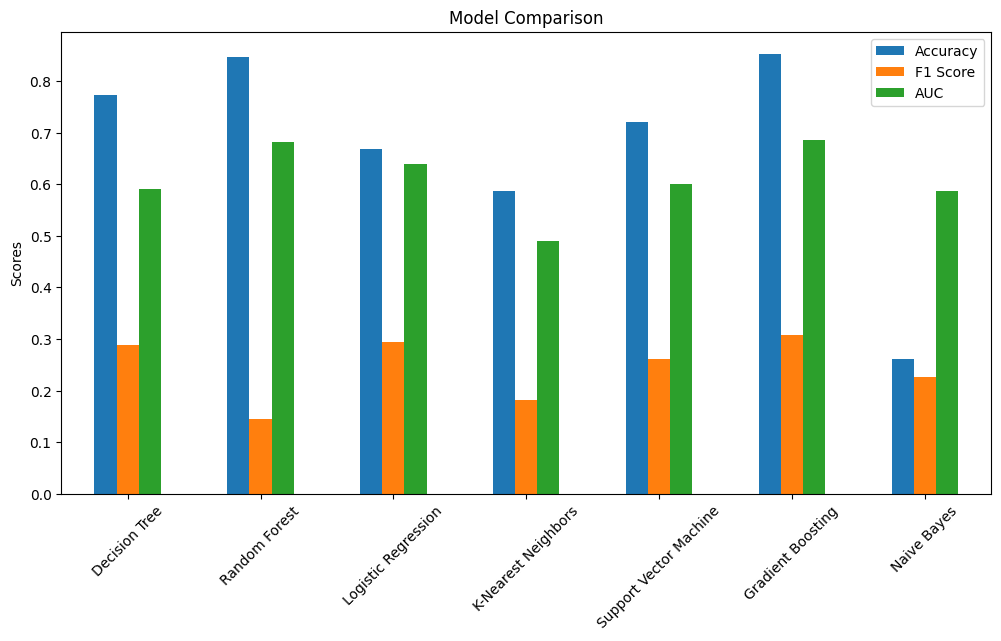

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    precision_recall_curve,
    confusion_matrix,
    classification_report
)
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from io import StringIO
from IPython.display import Image
import pydotplus

# Data Preprocessing
X = suhi_filtered_df_clf.drop('day_readmit', axis=1)
y = suhi_filtered_df_clf['day_readmit']

# Handle missing values (example: filling with mean)
X.fillna(X.mean(), inplace=True)

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# List of classifiers to evaluate
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
}

# Evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    results[name] = {"Accuracy": accuracy, "F1 Score": f1, "AUC": auc}

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"AUC: {auc:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Visualize Decision Tree
dt_clf = classifiers["Decision Tree"]
dot_data = StringIO()
export_graphviz(
    dt_clf,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=suhi_filtered_df_clf.drop('day_readmit', axis=1).columns,
    class_names=["No Readmit", "Readmit"]
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Compare Results
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(12, 6), title="Model Comparison")
plt.ylabel("Scores")
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


--- Decision Tree ---
Accuracy: 0.72
F1 Score: 0.25
AUC: 0.56

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83       264
         1.0       0.19      0.34      0.25        41

    accuracy                           0.72       305
   macro avg       0.54      0.56      0.54       305
weighted avg       0.79      0.72      0.75       305


Confusion Matrix:
[[206  58]
 [ 27  14]]


--- Random Forest ---
Accuracy: 0.83
F1 Score: 0.16
AUC: 0.67

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       264
         1.0       0.23      0.12      0.16        41

    accuracy                           0.83       305
   macro avg       0.55      0.53      0.53       305
weighted avg       0.79      0.83      0.80       305


Confusion Matrix:
[[247  17]
 [ 36   5]]


--- Logistic Regression ---
Accuracy: 0.67
F1 Score: 0.29
AUC: 0.62

Classification Re

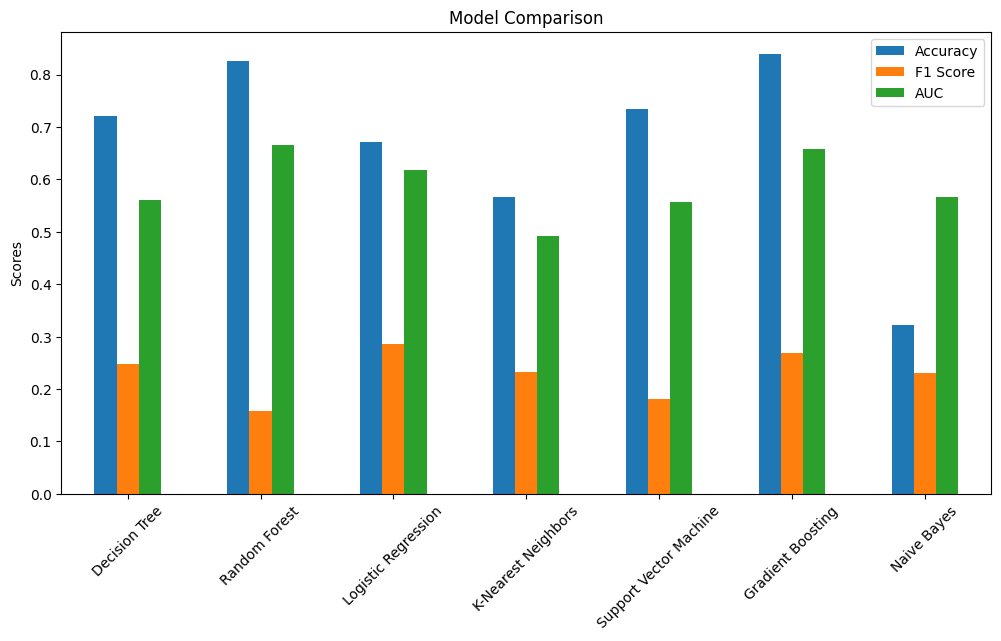

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    precision_recall_curve,
    confusion_matrix,
    classification_report
)
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from io import StringIO
from IPython.display import Image
import pydotplus

# Data Preprocessing
X = suhi_filtered_df_clf.drop('day_readmit', axis=1)
y = suhi_filtered_df_clf['day_readmit']

# Handle missing values (example: filling with mean)
X.fillna(X.mean(), inplace=True)

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# List of classifiers to evaluate
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
}

# Evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    results[name] = {"Accuracy": accuracy, "F1 Score": f1, "AUC": auc}

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"AUC: {auc:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Visualize Decision Tree
dt_clf = classifiers["Decision Tree"]
dot_data = StringIO()
export_graphviz(
    dt_clf,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=suhi_filtered_df_clf.drop('day_readmit', axis=1).columns,
    class_names=["No Readmit", "Readmit"]
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Compare Results
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(12, 6), title="Model Comparison")
plt.ylabel("Scores")
plt.xticks(rotation=45)
plt.show()


In [ ]:
!pip install tmplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.1 MB/s eta 0:00:00


In [ ]:
import tmplot as tmp
tmp.report(model=model, docs=texts)

/usr/local/lib/python3.10/dist-packages/tmplot/_helpers.py:45: UserWarning: Please install "tomotopy" package to analyze its models.
Run `pip install tomotopy` in the console.
  warn(
/usr/local/lib/python3.10/dist-packages/tmplot/_helpers.py:45: UserWarning: Please install "tomotopy" package to analyze its models.
Run `pip install tomotopy` in the console.
  warn(
/usr/local/lib/python3.10/dist-packages/tmplot/_helpers.py:45: UserWarning: Please install "tomotopy" package to analyze its models.
Run `pip install tomotopy` in the console.
  warn(
/usr/local/lib/python3.10/dist-packages/tmplot/_helpers.py:45: UserWarning: Please install "tomotopy" package to analyze its models.
Run `pip install tomotopy` in the console.
  warn(
